# BANK MARKETING CAMPAIGN PROJECT

# PROBLEM STATEMENT

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
The classification goal is to predict if the client will subscribe a term deposit or not.(variable y)

## --> Dataset information
bank-full.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_bank_data = pd.read_csv("/Users/sooriya/Downloads/bank-full.csv")

In [8]:
df_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df_bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


From the above, we can see that there are no-null values present in any of the features.
Also,There are about 9 object dtypes and then 7 int dtypes.

In [11]:
df_bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


From the description of the Numerical Features, 
we could see the outliers present in all these features since the max values vary larly from the mean value.

# Preprocessing Dataset

# Check the shape of dataframe and null values


In [12]:
df_bank_data.shape
#Returns the number of rows and columns

(45211, 17)

In [13]:
df_bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There is no Null values present in the dataset as evident from the above.

In [14]:
df_bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [15]:
print(df_bank_data['age'].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


In [16]:
print(df_bank_data['job'].unique())
print(df_bank_data['job'].value_counts())
print("Unknown % is: {0}".format((288/df_bank_data['job'].count())*100))
#remove the unknown rows since missing percentage is very less.

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Unknown % is: 0.6370131162770122


In [17]:
print(df_bank_data['marital'].unique())
print(df_bank_data['marital'].value_counts())

['married' 'single' 'divorced']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [18]:
print(df_bank_data['education'].unique())
print(df_bank_data['education'].value_counts())
print('Unknown % in education column')
round(1857/45211 * 100,2)
#Replace the unknown values with Secondary level of Education(Mode value)

['tertiary' 'secondary' 'unknown' 'primary']
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Unknown % in education column


4.11

In [19]:
df_bank_data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [20]:
print(df_bank_data['contact'].unique())
print(df_bank_data['contact'].value_counts())
print('Unknown % in contact column')
round(13020/45211 * 100,2)
#Replace unknown rows with cellular (mode value)

['unknown' 'cellular' 'telephone']
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
Unknown % in contact column


28.8

In [21]:
print(df_bank_data['poutcome'].unique())
print(df_bank_data['poutcome'].value_counts())
print('Unknown % in poutcome column is:')
round(36959/45211 * 100,2)
#replace with the other values.

['unknown' 'failure' 'other' 'success']
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
Unknown % in poutcome column is:


81.75

In [22]:
print(df_bank_data['default'].value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [23]:
print(df_bank_data['loan'].value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [24]:
df_bank_data['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [25]:
print(df_bank_data['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [26]:
print(df_bank_data['campaign'].unique())


[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [27]:
print(df_bank_data['previous'].unique())


[  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]


In [28]:
print(df_bank_data['Target'].value_counts())

no     39922
yes     5289
Name: Target, dtype: int64


# Missing and null value observations


*   Job has 0.63% unknown value - drop unknown rows
*   Education has 4.11% unknown values - drop unknown rows
*   Contact has 13020 unknown value - replace unknown with cellular value.
*   Day and month has nan value = drop nan rows
*   Poutcome has 81.75% unknown values - replace unknown with others value.
*   Age has no null/missing value
*   Previous has no null/missing value
*   Marital has no null/missing value


In [29]:

# Removing unknown from job
mask = df_bank_data['job'] == 'unknown'
df_bank_data = df_bank_data[~mask]

#Removing unknown from education
mask = df_bank_data['education'] == 'unknown'
df_bank_data = df_bank_data[~mask]

#Replacing unknown with cellular in contact
df_bank_data['contact'].replace('unknown', 'cellular', inplace=True)

#Replacing unknown with others in poutcome
df_bank_data['poutcome'].replace('unknown', 'other', inplace=True)

#Dropping na
df_bank_data.dropna(inplace=True)
df_bank_data.shape

(43193, 17)

In [30]:
#Checking nancount across entire dataset
#Nan Count is 0 after preprocessing
df_bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [31]:
#Dropping both day and month since both are not useful.
df_bank_data.drop(['day'],axis=1,inplace=True)
df_bank_data.drop(['month'],axis=1,inplace=True)


In [32]:
df_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,cellular,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76,1,-1,0,other,no
5,35,management,married,tertiary,no,231,yes,no,cellular,139,1,-1,0,other,no
6,28,management,single,tertiary,no,447,yes,yes,cellular,217,1,-1,0,other,no


# Univariate Analysis

Axes(0.125,0.11;0.775x0.77)


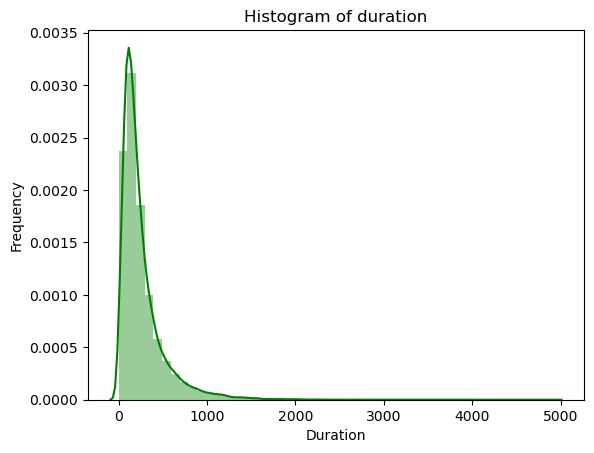

In [33]:
#Converting duration to categorical based on histogram
print(sns.distplot(df_bank_data['duration'],color='green'));
plt.title('Histogram of duration')
plt.ylabel('Frequency')
plt.xlabel('Duration')

bin_edges = [0, 500,1000,2000]  # Defining the bin edges here based on histogram

#Create labels for the bins
bin_labels = ["Low", "Medium", "High"]

# Use the cut() function to convert the continuous variable to a categorical variable
df_bank_data['duration_categorical'] = pd.cut(df_bank_data['duration'], bins=bin_edges, labels=bin_labels)


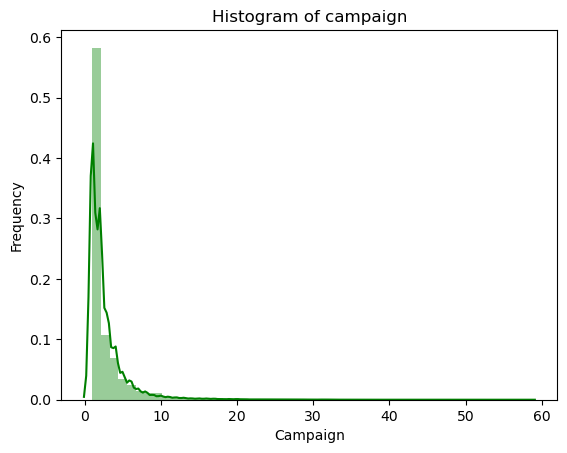

In [34]:
sns.distplot(df_bank_data['campaign'],color='green');
plt.title('Histogram of campaign')
plt.ylabel('Frequency')
plt.xlabel('Campaign')

bin_edges = [0, 6, 12, 60]  # Defining the bin edges here based on histogram
# Create labels for the bins
bin_labels = ["Low", "Medium", "High"]
# Use the cut() function to convert the continuous variable to a categorical variable
df_bank_data['campaign_categorical'] = pd.cut(df_bank_data['campaign'], bins=bin_edges, labels=bin_labels)


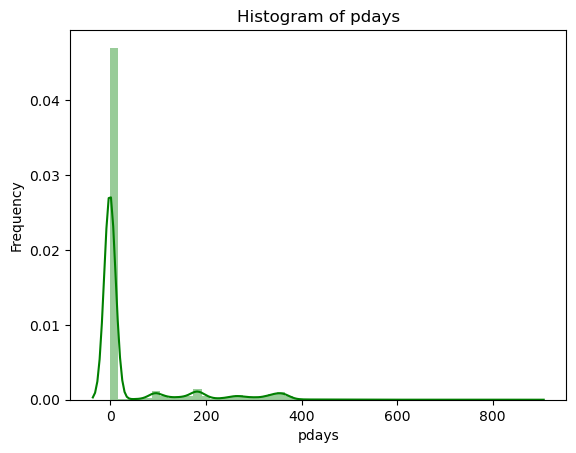

In [35]:
sns.distplot(df_bank_data['pdays'],color='green');
plt.title('Histogram of pdays')
plt.ylabel('Frequency')
bin_edges = [-2,0, 100, 200, 420,900]  # Define your own bin edges here
# Create labels for the bins
bin_labels = ["Not Contacted","Less Days", "Moderate Days", "More Days","Max Days"]
# Use the cut() function to convert the continuous variable to a categorical variable
df_bank_data['pdays_categorical'] = pd.cut(df_bank_data['pdays'], bins=bin_edges, labels=bin_labels)

Number of pdays is zero for most of the people.

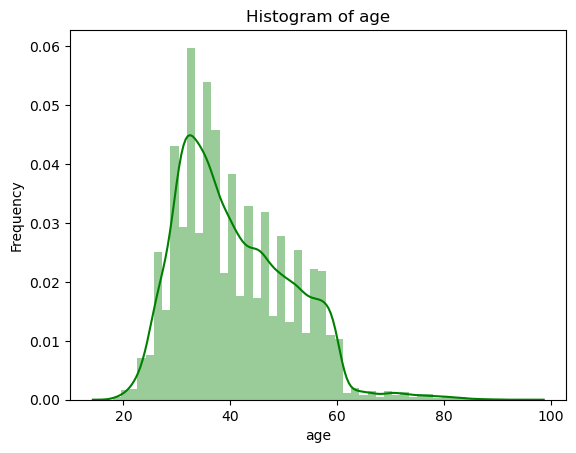

In [36]:
sns.distplot(df_bank_data['age'],color='green');
plt.title('Histogram of age')
plt.ylabel('Frequency')
bin_edges = [0,35, 65,100]  # Define your own bin edges here
# Create labels for the bins
bin_labels = ['Young', 'Middle-aged', 'Senior']
# Use the cut() function to convert the continuous variable to a categorical variable
df_bank_data['age_categorical'] = pd.cut(df_bank_data['age'], bins=bin_edges, labels=bin_labels)

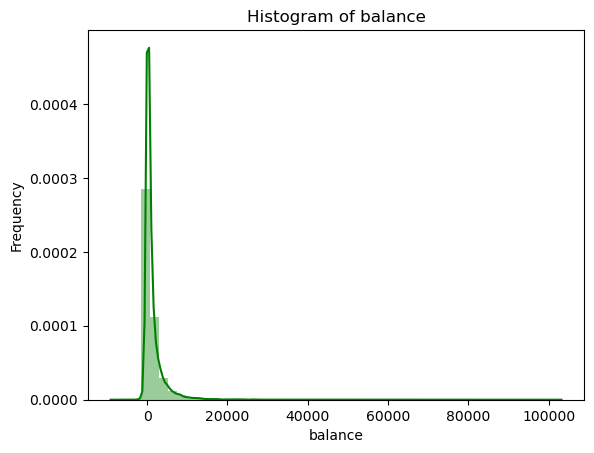

In [37]:
sns.distplot(df_bank_data['balance'],color='green');
plt.title('Histogram of balance')
plt.ylabel('Frequency')
bin_edges = [-100000,0,10000,60000,1000000]  # Define your own bin edges here
# Create labels for the bins
bin_labels = ['Negative Balance', 'low Balance', 'Medium Balance','High Balance']
# Use the cut() function to convert the continuous variable to a categorical variable
df_bank_data['balance_categorical'] = pd.cut(df_bank_data['balance'], bins=bin_edges, labels=bin_labels)

The frequency of the customers with negative balance is more compared to the people who have got a positive balance.


In [38]:
# Drop the old columns
df_bank_data = df_bank_data.drop(columns = ['age','balance','pdays','duration','campaign'])

In [39]:
df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   job                   43193 non-null  object  
 1   marital               43193 non-null  object  
 2   education             43193 non-null  object  
 3   default               43193 non-null  object  
 4   housing               43193 non-null  object  
 5   loan                  43193 non-null  object  
 6   contact               43193 non-null  object  
 7   previous              43193 non-null  int64   
 8   poutcome              43193 non-null  object  
 9   Target                43193 non-null  object  
 10  duration_categorical  43132 non-null  category
 11  campaign_categorical  43193 non-null  category
 12  pdays_categorical     43193 non-null  category
 13  age_categorical       43193 non-null  category
 14  balance_categorical   43193 non-null  category
dtypes:

In [40]:
df_bank_data.head()

,job,marital,education,default,housing,loan,contact,previous,poutcome,Target,duration_categorical,campaign_categorical,pdays_categorical,age_categorical,balance_categorical
0,management,married,tertiary,no,yes,no,cellular,0,other,no,Low,Low,Not Contacted,Middle-aged,low Balance
1,technician,single,secondary,no,yes,no,cellular,0,other,no,Low,Low,Not Contacted,Middle-aged,low Balance
2,entrepreneur,married,secondary,no,yes,yes,cellular,0,other,no,Low,Low,Not Contacted,Young,low Balance
5,management,married,tertiary,no,yes,no,cellular,0,other,no,Low,Low,Not Contacted,Young,low Balance
6,management,single,tertiary,no,yes,yes,cellular,0,other,no,Low,Low,Not Contacted,Young,low Balance


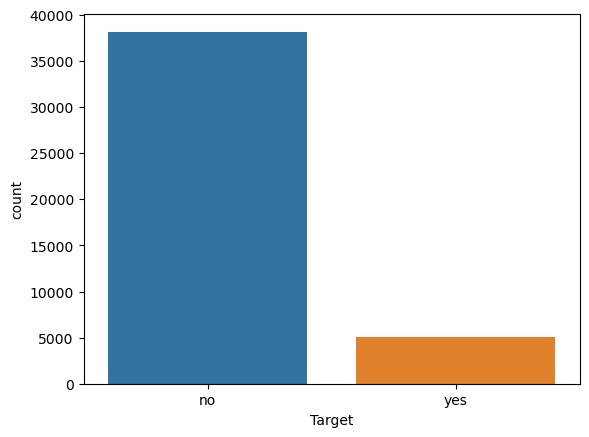

In [41]:
sns.countplot(x='Target',data=df_bank_data)
plt.show()

People who subscribed for a term deposit seems to be 85% less than the people who have not subscribed for a term deposit. 

# Multivariate Analysis

<Axes: xlabel='age_categorical', ylabel='count'>

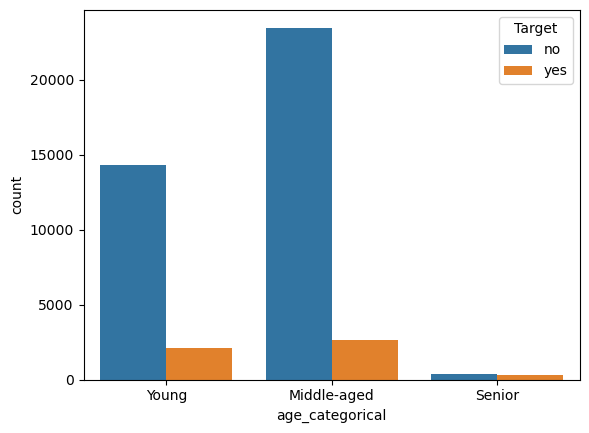

In [42]:
# Influence of age_categorical on Target
sns.countplot(x='age_categorical',data=df_bank_data,hue='Target')

Number of Middle-aged people are more who have not subscribed for the Term Deposit.

<Axes: xlabel='duration_categorical', ylabel='count'>

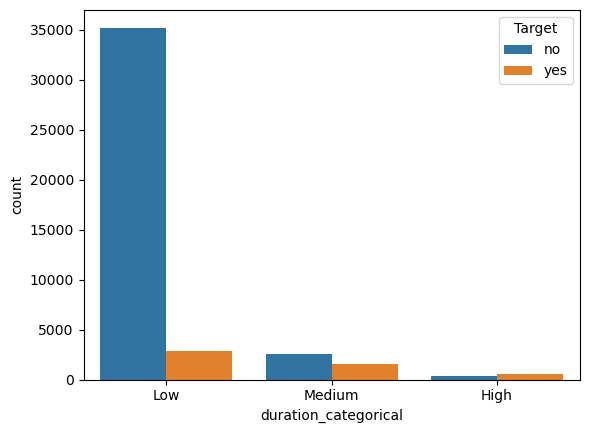

In [43]:
# Influence of duration_categorical on Target
sns.countplot(x='duration_categorical',data=df_bank_data,hue='Target')

Number of Middle-aged people who have not subscribed for the Term Deposit are more in number.

<Axes: xlabel='pdays_categorical', ylabel='count'>

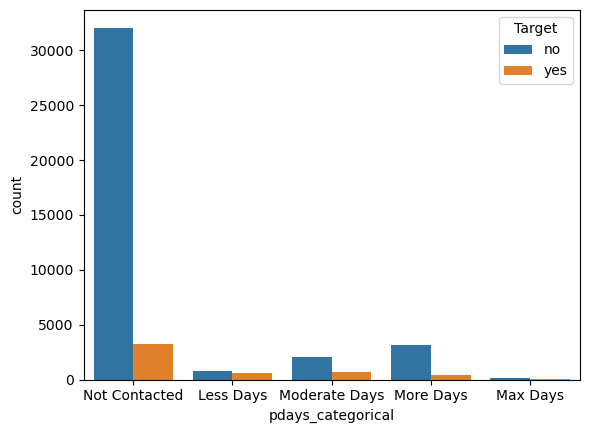

In [44]:
# Influence of pdays_categorical on Target
sns.countplot(x='pdays_categorical',data=df_bank_data,hue='Target')

There are more people without suscription for Term deposit who have not been contacted.

<Axes: xlabel='campaign_categorical', ylabel='count'>

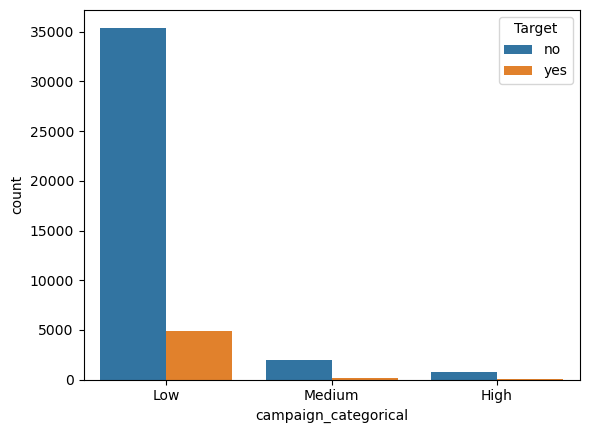

In [45]:
# Influence of campaign_categorical on Target
sns.countplot(x='campaign_categorical',data=df_bank_data,hue='Target')

Number of contacts which are low are high in number during the campaign and without subscription.

<Axes: xlabel='balance_categorical', ylabel='count'>

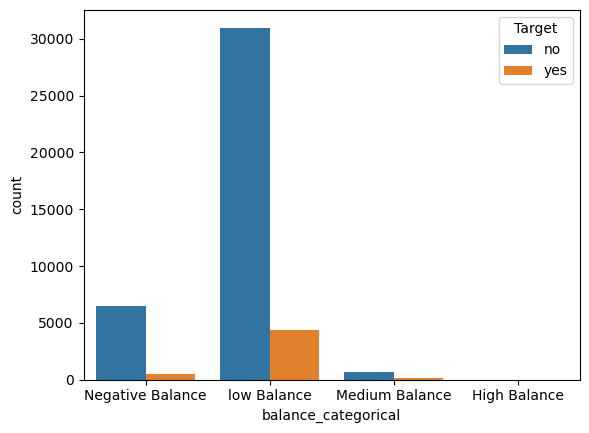

In [46]:
# Influence of balance_categorical on Target
sns.countplot(x='balance_categorical',data=df_bank_data,hue='Target')

People with low balance are high in number and have not subscribed for a term deposit.

<Axes: xlabel='loan', ylabel='count'>

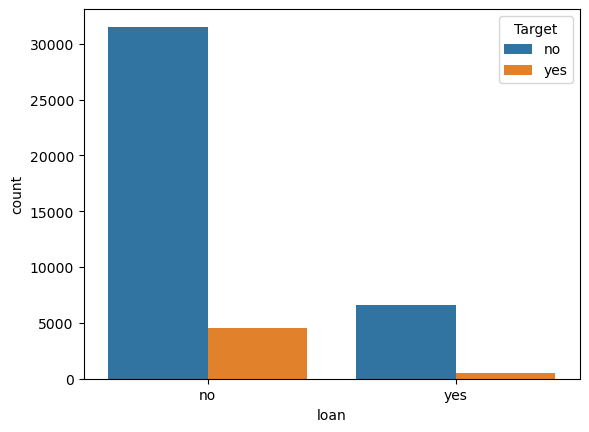

In [47]:
# Influence of loan on Target
sns.countplot(x='loan',data=df_bank_data,hue='Target')

People who dont have loan are high in number and they have also not subscribed for a Term Deposit.

<Axes: xlabel='contact', ylabel='count'>

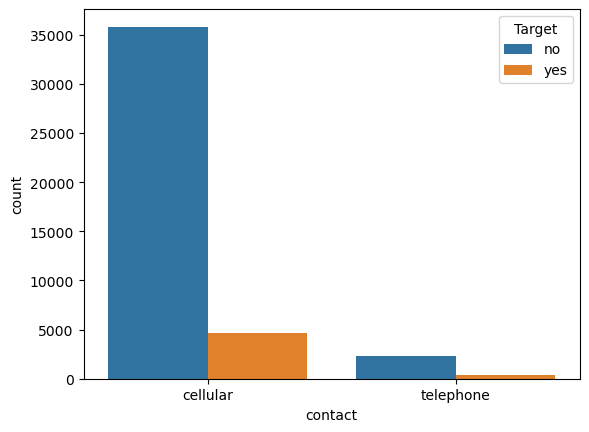

In [48]:
# Influence of contact on Target
sns.countplot(x='contact',data=df_bank_data,hue='Target')

People who have not subscribed for term Deposit and have cellular contact are more in number.

<Axes: >

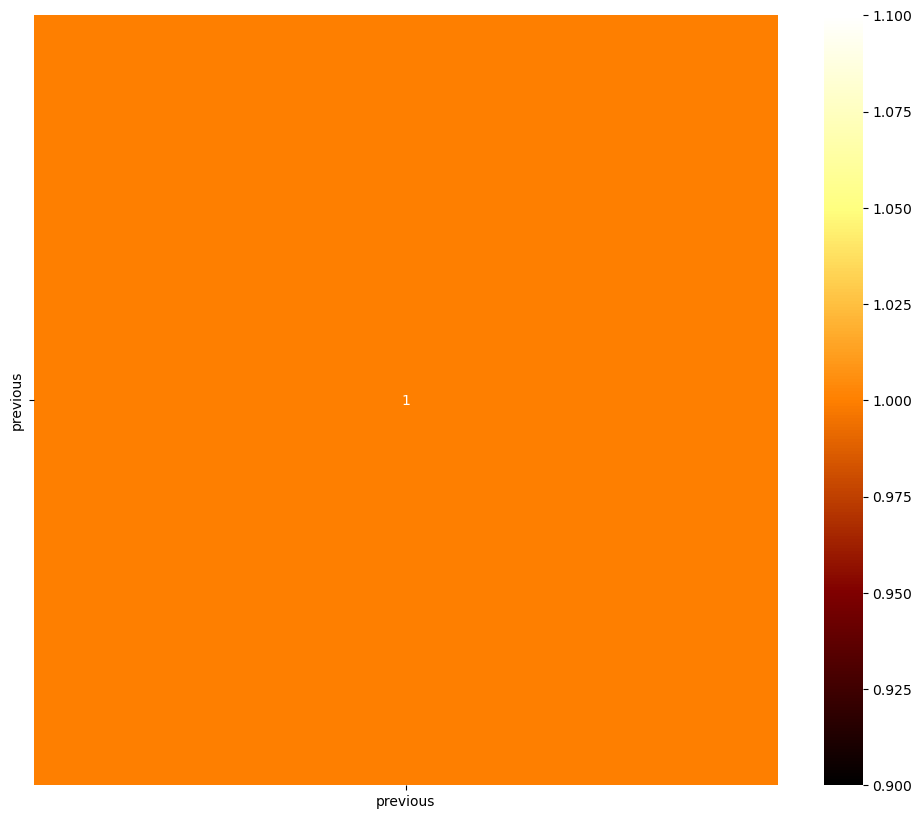

In [49]:
fig = plt.subplots(figsize=(12,10))
sns.heatmap(df_bank_data.corr(), cmap='afmhot' , annot = True)

In [50]:
#Performing Label Encoding to convert continous feature to categorical feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_bank_data['job'] = label_encoder.fit_transform(df_bank_data['job'])
df_bank_data['marital'] = label_encoder.fit_transform(df_bank_data['marital'])
df_bank_data['default'] = label_encoder.fit_transform(df_bank_data['default'])
df_bank_data['education'] = label_encoder.fit_transform(df_bank_data['education'])
df_bank_data['housing'] = label_encoder.fit_transform(df_bank_data['housing'])
df_bank_data['loan'] = label_encoder.fit_transform(df_bank_data['loan'])
df_bank_data['contact'] = label_encoder.fit_transform(df_bank_data['contact'])
df_bank_data['poutcome'] = label_encoder.fit_transform(df_bank_data['poutcome'])
df_bank_data['duration_categorical'] = label_encoder.fit_transform(df_bank_data['duration_categorical'])
df_bank_data['campaign_categorical'] = label_encoder.fit_transform(df_bank_data['campaign_categorical'])
df_bank_data['pdays_categorical'] = label_encoder.fit_transform(df_bank_data['pdays_categorical'])
df_bank_data['age_categorical'] = label_encoder.fit_transform(df_bank_data['age_categorical'])
df_bank_data['balance_categorical'] = label_encoder.fit_transform(df_bank_data['balance_categorical'])
df_bank_data['Target'] = label_encoder.fit_transform(df_bank_data['Target'])

In [51]:
df_bank_data.head()

,job,marital,education,default,housing,loan,contact,previous,poutcome,Target,duration_categorical,campaign_categorical,pdays_categorical,age_categorical,balance_categorical
0,4,1,2,0,1,0,0,0,1,0,1,1,4,0,3
1,9,2,1,0,1,0,0,0,1,0,1,1,4,0,3
2,2,1,1,0,1,1,0,0,1,0,1,1,4,2,3
5,4,1,2,0,1,0,0,0,1,0,1,1,4,2,3
6,4,2,2,0,1,1,0,0,1,0,1,1,4,2,3


No good Correlation between the features.

# Handle Imbalance data


In [52]:
#Synthetic Minority Over-Sampling Technique
#from imblearn.over_sampling import SMOTE
y = df_bank_data['Target']
x = df_bank_data.drop(['Target'], axis = 1)

In [53]:
x.shape


(43193, 14)

In [54]:
y.shape

(43193,)

In [55]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(x, y.values.ravel())

In [56]:
#x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())


In [57]:
print(X_resampled.shape)
print(y_resampled.shape)

(76344, 14)
(76344,)


# Normalise data and split the data into training and test set in the ratio of 70:30 respectively

In [58]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
# Splitting the data into train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3, random_state = 42,stratify = y_resampled)

In [60]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

We will apply the StandardScaler to the dataset to standardize the input variables.

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score , precision_score , f1_score , accuracy_score, roc_auc_score
model = LogisticRegression()


In [62]:
model.fit(X_train, Y_train)
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print(cv_scores)
cv_score = np.mean(cv_scores)
print(cv_score)

[0.6925524  0.68834207 0.69638847 0.69470434 0.69498503]
0.6933944610778443


In [63]:
X_test_pred1 = model.predict(X_test)
X_test_pred1

array([0, 1, 1, ..., 0, 1, 0])

In [64]:
model.score(X_test,Y_test)


0.6900541390150192

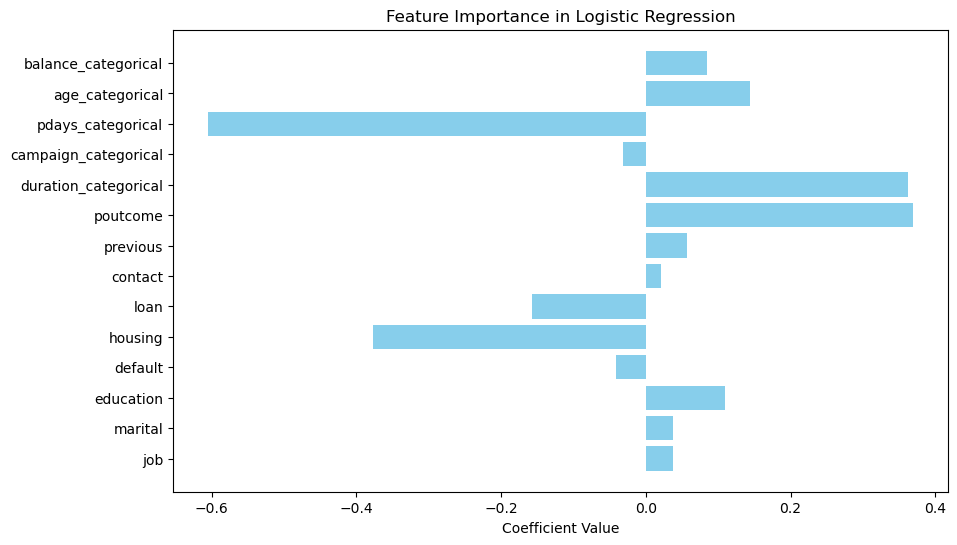

In [65]:
coefficients = model.coef_[0]
#feature_names = [f'Feature {i+1}' for i in range(len(coefficients))]

# Plot the feature importance curve
plt.figure(figsize=(10, 6))
plt.barh(X_resampled.columns , coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [66]:
conf_matrix = confusion_matrix(Y_test, X_test_pred1)
conf_matrix

array([[8375, 3077],
       [4022, 7430]])

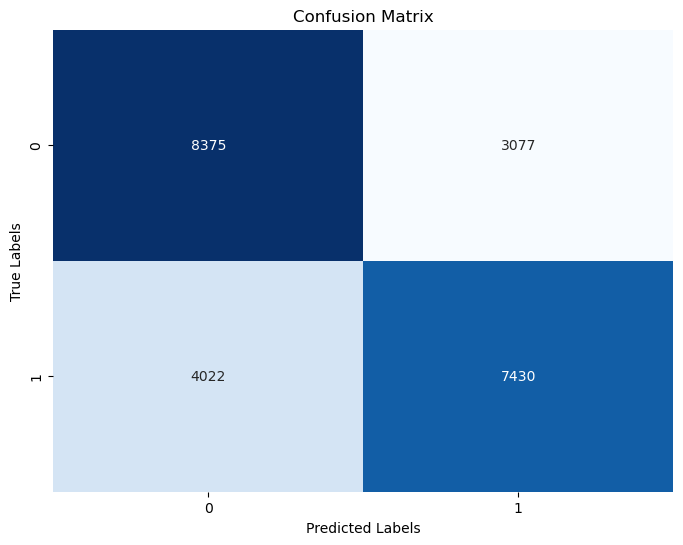

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred1))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     11452
           1       0.71      0.65      0.68     11452

    accuracy                           0.69     22904
   macro avg       0.69      0.69      0.69     22904
weighted avg       0.69      0.69      0.69     22904



For Random Forest, we got 69% accuracy.

# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model2 = DecisionTreeClassifier()


In [71]:
model2.fit(X_train, Y_train)
cv_scores2 = cross_val_score(model2, X_train, Y_train, cv=5)
print(cv_scores2)
cv_score2 = np.mean(cv_scores2)
print(cv_score2)

[0.82980913 0.82971557 0.83149326 0.8288735  0.82569237]
0.829116766467066


In [72]:
X_test_pred2 = model2.predict(X_test)
X_test_pred2

array([0, 0, 1, ..., 0, 1, 0])

In [73]:
model2.score(X_test,Y_test)


0.8331732448480614

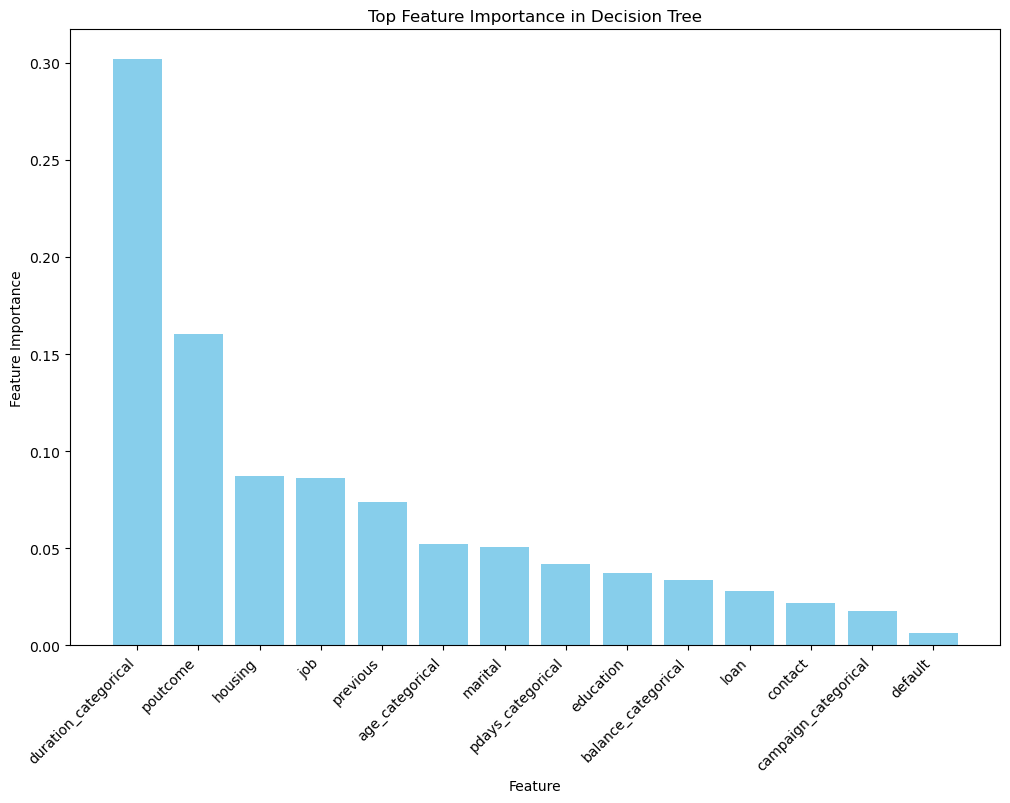

In [74]:
importances = model2.feature_importances_

# Select the top features
top_feature_indices = importances.argsort()[::-1][:]
top_features = X_resampled.columns[top_feature_indices]

# Plot the feature importance curve
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_feature_indices)), importances[top_feature_indices], color='skyblue')
plt.xticks(range(len(top_feature_indices)), top_features, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance in Decision Tree')
plt.show()

In [75]:
conf_matrix2 = confusion_matrix(Y_test, X_test_pred2)
conf_matrix2

array([[9628, 1824],
       [1997, 9455]])

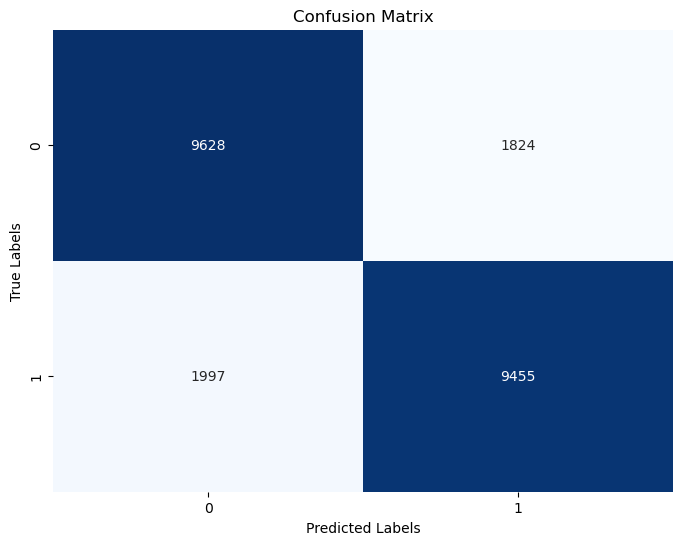

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [77]:
print(classification_report(Y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     11452
           1       0.84      0.83      0.83     11452

    accuracy                           0.83     22904
   macro avg       0.83      0.83      0.83     22904
weighted avg       0.83      0.83      0.83     22904



For Decision Tree Classifier, we got 74% accuracy. The ROC Auc score is 0.8179.

# K-Nearest Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model3 = KNeighborsClassifier()

In [80]:
model3.fit(X_train, Y_train)
#cv_scores3 = cross_val_score(model3, X_train, Y_train, cv=5)
#print(cv_scores3)
#cv_score3 = np.mean(cv_scores3)
#print(cv_score3)

KNeighborsClassifier()

In [81]:
X_test_pred3 = model3.predict(X_test)
X_test_pred3

array([0, 0, 1, ..., 0, 1, 0])

In [82]:
model3.score(X_test,Y_test)

0.794708347886832

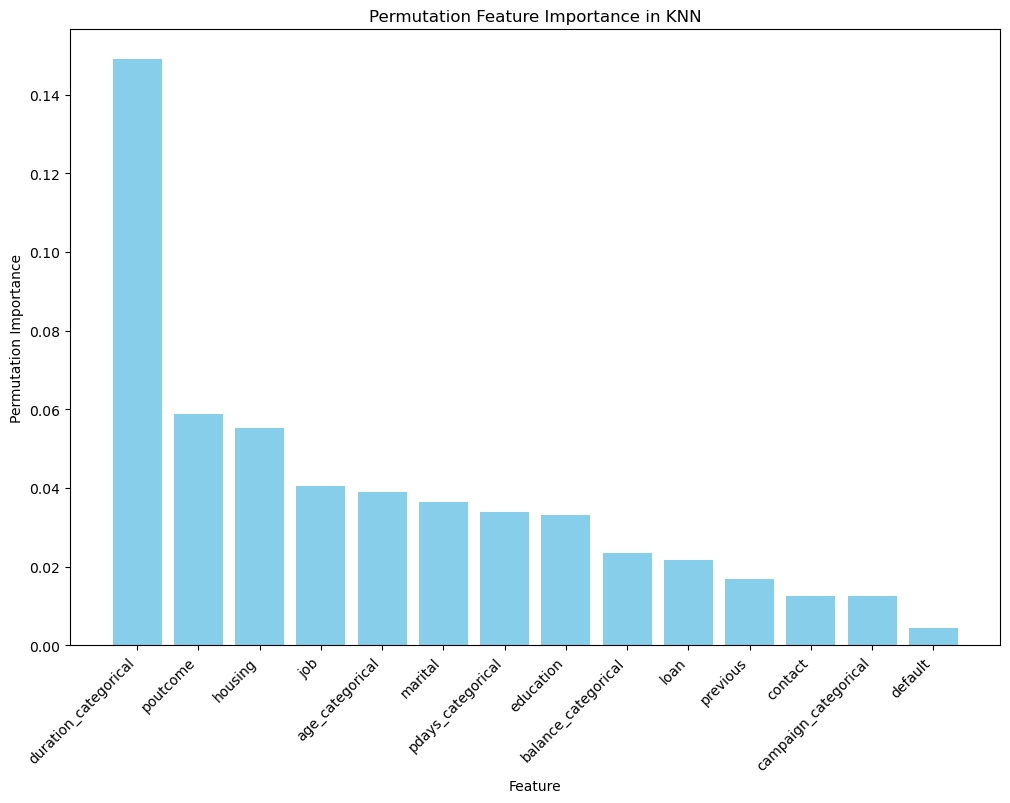

In [85]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model3, X_test, Y_test)

# Get feature importances and their indices
feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]
top_features = X_resampled.columns[feature_indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), feature_importances[feature_indices], color='skyblue')
plt.xticks(range(len(feature_indices)), top_features, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance in KNN')
plt.show()

In [86]:
conf_matrix3 = confusion_matrix(Y_test, X_test_pred3)
conf_matrix3

array([[8636, 2816],
       [1886, 9566]])

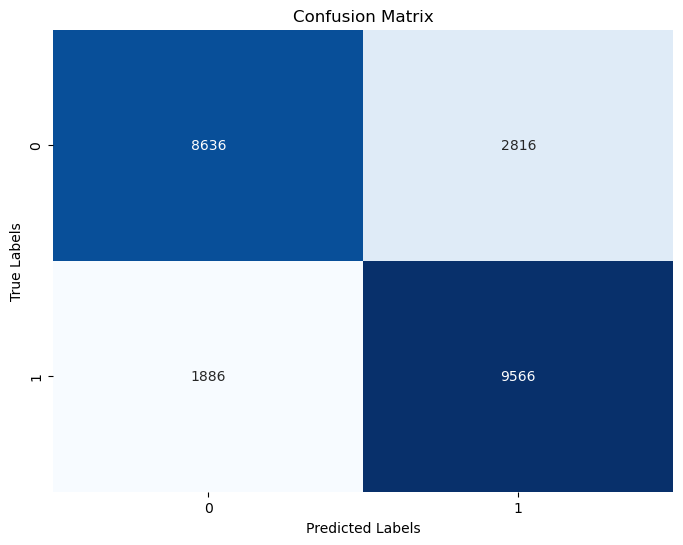

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [88]:
print(classification_report(Y_test,X_test_pred3))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79     11452
           1       0.77      0.84      0.80     11452

    accuracy                           0.79     22904
   macro avg       0.80      0.79      0.79     22904
weighted avg       0.80      0.79      0.79     22904



For KNN, we got 80% accuracy. The ROC Auc score is 0.7970.

# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=42)

In [90]:
model4.fit(X_train, Y_train)
cv_scores4 = cross_val_score(model4, X_train, Y_train, cv=5)
print(cv_scores4)
cv_score4 = np.mean(cv_scores4)
print(cv_score4)

[0.83242889 0.83186751 0.83177395 0.82934132 0.83083832]
0.83125


In [91]:
X_test_pred4 = model4.predict(X_test)
X_test_pred4

array([0, 0, 1, ..., 0, 1, 0])

In [92]:
model4.score(X_test,Y_test)

0.8330422633601118

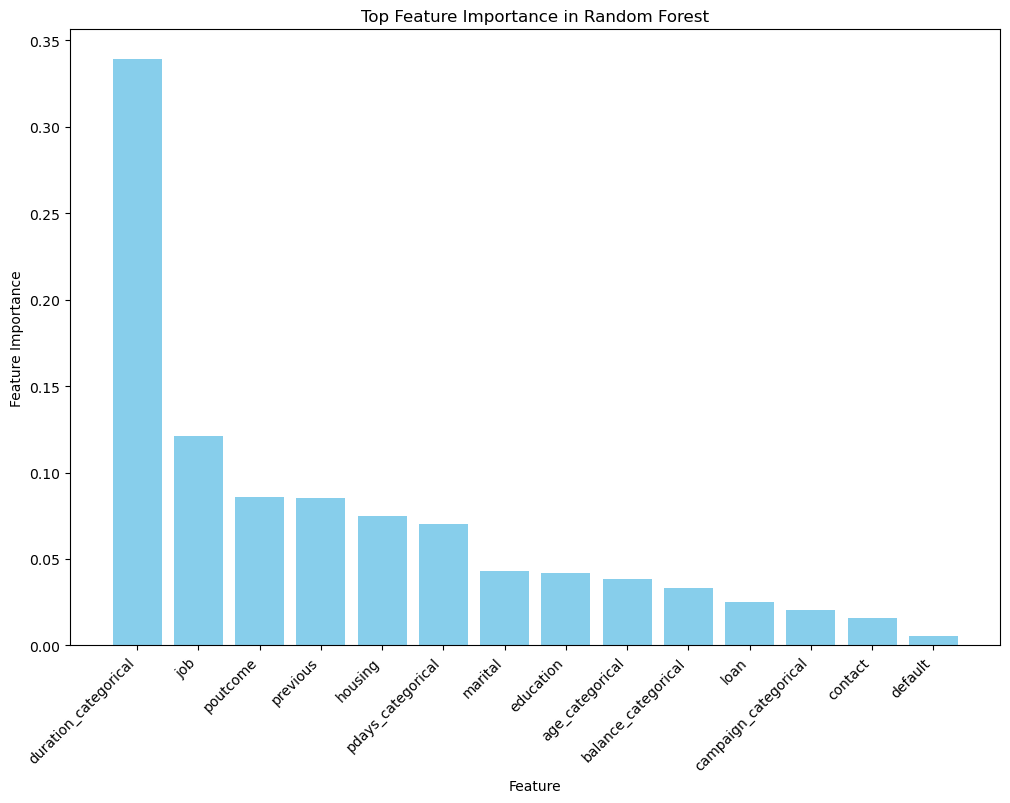

In [93]:
importances = model4.feature_importances_

# Select the top features
top_feature_indices = importances.argsort()[::-1][:]
top_features = X_resampled.columns[top_feature_indices]

# Plot the feature importance curve
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_feature_indices)), importances[top_feature_indices], color='skyblue')
plt.xticks(range(len(top_feature_indices)), top_features, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance in Random Forest')
plt.show()

In [94]:
conf_matrix4 = confusion_matrix(Y_test, X_test_pred4)
conf_matrix4

array([[9582, 1870],
       [1954, 9498]])

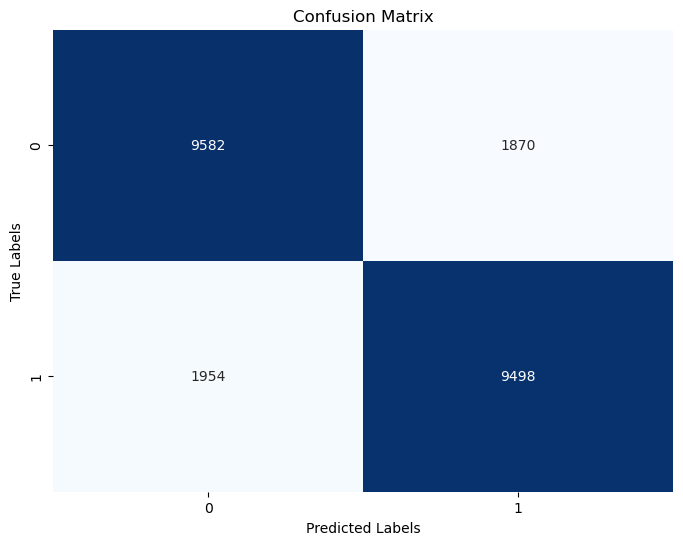

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
print(classification_report(Y_test,X_test_pred4))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     11452
           1       0.84      0.83      0.83     11452

    accuracy                           0.83     22904
   macro avg       0.83      0.83      0.83     22904
weighted avg       0.83      0.83      0.83     22904



For Random Forest, we got 82% accuracy. The ROC Auc score is 0.8240.

# ROC CURVE

Model AUC score for Logistic regression: 0.6900541390150192
Model AUC score for Decision Tree: 0.8331732448480614
Model AUC score for KNN: 0.794708347886832
Model AUC score for random forest: 0.8330422633601118


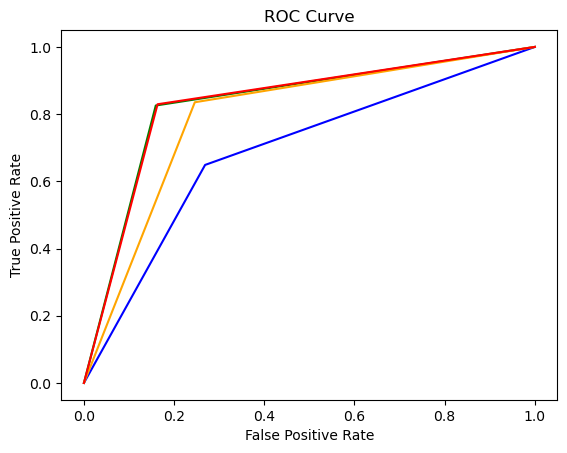

In [97]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, color='green'):
    """
    plots the roc curve based on the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, color=color)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(Y_test, X_test_pred1, color='Blue')
print(f'Model AUC score for Logistic regression: {roc_auc_score(Y_test, X_test_pred1)}')
plot_roc_curve(Y_test, X_test_pred2, color='green')
print(f'Model AUC score for Decision Tree: {roc_auc_score(Y_test, X_test_pred2)}')
plot_roc_curve(Y_test, X_test_pred3, color='orange')
print(f'Model AUC score for KNN: {roc_auc_score(Y_test, X_test_pred3)}')
plot_roc_curve(Y_test, X_test_pred4, color='red')
print(f'Model AUC score for random forest: {roc_auc_score(Y_test, X_test_pred4)}')

The Random Forest model's ROC curve is slightly better than the Decision Tree's ROC curve as it is closer to the top-left corner of the graph compared to the other Classifiers.
The AUC score for the Random Forest is slightly higher than that of the Decision Tree (0.8330 vs. 0.8329), 
indicating that both Random Forest and decision Tree performs slightly better in terms of distinguishing between the positive and negative classes based on the dataset.

# Conclusion

We were able to observe that Both Random Forest and the Decision Tree Model performed better than the other 2 models and had the highest accuracy amongst other Models. Also, We could observe that Duration was the most influential feature for Prediction in all the 4 models followed by poutcome.